## Importing libraries 

In [1]:
from importlib import reload
import seaborn as sns
import matplotlib.pyplot as plt
from Bio.Seq import Seq

##  Class BacterialChromosome

In [2]:
class BacterialChromosome:
    
    """An example class to contain info about bacterial chromosome and print it out"""
    
    def __init__(self, chromosome_id, organism_name = 'unknown', length = 0, sequence = ''):
        self.chromosome_id = chromosome_id
        self.organism_name = organism_name
        self.length = length
        self.sequence = sequence
    
    def print_sequence(self):
        """print out the sequence"""
        if self.sequence == '':
            print ('No sequence')
        else:
            print (self.sequence)
    
    def print_info (self):
        """print out chromosome_id, organism and length"""
        print (f'chromosome id: {self.chromosome_id} \nOrganism: {self.organism_name} \nlength: {self.length}')  
    
    @classmethod
    def from_gbff(cls, path_to_file): 
        """get chromosome id, organism name and sequence length from GB file. 
        Only the first record in gb file will be processed!"""
        with open(path_to_file) as file:
            for line in file: 
                if 'LOCUS' in line: 
                    length = line.split()[2]
                    break
            for line in file:
                if 'ACCESSION' in line:
                    chromosome_id = line.split()[1]
                    break
            for line in file:
                if 'ORGANISM' in line: 
                    organism_name = ' '.join (line.split()[1:])
                    break

                    
        return cls(chromosome_id, organism_name, length)

To create a genome, you can provide parameters explicitly 

In [3]:
bact1 = BacterialChromosome(chromosome_id='SOMEID1', organism_name = 'Bacteria 1', length = 10, sequence = 'ATGCATGCAT')
bact1.print_info()
bact1.print_sequence()

chromosome id: SOMEID1 
Organism: Bacteria 1 
length: 10
ATGCATGCAT


... or read a .gb file

In [4]:
bact2 = BacterialChromosome.from_gbff('./GCA_000013305.1_ASM1330v1_genomic.gbff')
bact2.print_info()
bact2.print_sequence()

chromosome id: CP000247 
Organism: Escherichia coli 536 
length: 4938920
No sequence


## Class MyRNA

In [5]:
class MyRNA:
    
    """A class that describes RNA, with traslation method and reverse transcription method"""
    
    def __init__(self, sequence = ''):
        rna_alphabet = ['A'.casefold(), 'U'.casefold(), 'G'.casefold(), 'C'.casefold()]
        for character in sequence:
            if character.casefold() not in rna_alphabet:
                raise Exception('not an RNA string')
        self.sequence = sequence
        
    def translate(self):
        
        """Traslation method - returns a protein string using standard genetic code"""
        
        my_rna = Seq(self.sequence)
        my_aa = str(my_rna.translate())
        return my_aa
    
    def back_transcribe(self): 
        
        """Reverse transcription method - returns a DNA string that corresponds to this RNA"""
        
        my_dna = self.sequence.replace('U', 'T')
        return (my_dna)

Create instance of myRNA

In [6]:
rna_example = MyRNA("GUCAUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAGUUG") # example was taken from biopython tutorial

Print sequence 

In [7]:
rna_example.sequence

'GUCAUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAGUUG'

Translate RNA

In [8]:
rna_example.translate()

'VMAIVMGR*KGAR*L'

Back transcribe RNA 

In [54]:
rna_example.back_transcribe()

'GTCATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAGTTG'

The class wil throw an error if the string is not RNA 

In [9]:
rna_example2 = MyRNA('ATGC')

Exception: not an RNA string

## Class MySet

In [11]:
class MySet(set):
    
    """a class that inherits from sets, contains only positive numbers when created and will not add non-positive values"""
    
    def __init__ (self, *args):
        # * args can contain several iterable items
        # first I create a list to contain alll the elements from those items
        self.modified_args = []
        # for every iterable item
        for arg in args:
            # for evety element
            for element in arg:
                # check that it is a number and if yes, that this number is positive
                if isinstance(element, (int, float)) and element > 0:
                    self.modified_args.append(element)
        # call _init_ of the parent, giving him the new list
        super().__init__(self.modified_args)
        
    # adds only positive elements
    def add(self, element):
        # again, checking that it is a number and if yes, that this number is positive
        if isinstance(element, (int, float)) and element > 0:
            # call add of the parent, giving him the new list
            super().add(element)

Object of class MySet will contain only positive numbers 

In [12]:
set1 = MySet([-1, 0, 1, 2, 3])
set2 = MySet([-1, 0, 1, 2, 3], [5, 28, -67], ['hello', 'world'])
print (set1, set2)

MySet({1, 2, 3}) MySet({1, 2, 3, 5, 28})


Adding anything except positive numbers is not possible 

In [13]:
set1.add(8)
set2.add(-8)
print (set1, set2)

MySet({8, 1, 2, 3}) MySet({1, 2, 3, 5, 28})


## Class Fasta

In [14]:
class Fasta():
    
    """A class that that collects some statistics from fasta file"""
    
    def __init__ (self, path):
        self.path = path
        self.seq_dict = {}
        counter = 0
        with open (path) as file:
            
            for line in file:
                counter += 1
                line = line.strip()
                if line == '':
                    pass
                if line.startswith('>'):
                    if counter > 1:
                        self.seq_dict[name] = seq
                        seq = ''
                        name = line[1:]
                    else:
                        seq = ''
                        name = line[1:]
                else:
                    seq = seq + line
        self.seq_dict[name] = seq
           
    def count_seqs(self):
        return len(self.seq_dict)
        
    def plot_len(self, save = False, name = './length.png'):
        lengths = [len(value) for value in self.seq_dict.values()]
        ax = sns.histplot(x=lengths, kde=True)
        ax.set(xlabel='length', title='Length histogram')
        if save == True:
            plt.savefig(fname = name, bbox_inches='tight')
        plt.show()
        plt.close()

    def gc(self):
        try:
            self.gc_dict
            return (self.gc_dict)
        except AttributeError:
            self.gc_dict = {}
            for key, value in self.seq_dict.items():
                seq = value.casefold()
                gc_all = seq.count('g')+seq.count('c')
                atgc_all = seq.count('g')+seq.count('c')+seq.count('a')+seq.count('t')
                gc_content = gc_all/atgc_all
                self.gc_dict[key] = gc_content
            return self.gc_dict
        
    def gc_average(self):
        self.gc()
        average = sum (self.gc_dict.values()) / len (self.seq_dict)
        return average
    
    def plot_gc_hist(self, save = False, name = './gc_hist.png'):
        self.gc()
        gc_values = [value for key, value in self.gc_dict.items()]
        ax = sns.histplot(x=gc_values, kde=True)
        ax.set(xlabel='GC-content', title='GC-content histogram')
        if save == True:
            plt.savefig(fname = name, bbox_inches='tight')
        plt.show()
        plt.close()

    def plot_4mers(self, save = False, name = './4mers.png'):
        try:
            self.k_mers_dict
        except AttributeError:
            self.k_mers_dict = {}
            for seq in self.seq_dict.values():
                for i in range (len(seq)-3):
                    kmer = seq[i:i+4]
                    if kmer not in self.k_mers_dict:
                        self.k_mers_dict[kmer] = 1
                    else:
                        self.k_mers_dict[kmer] +=1
            self.k_mers_dict = dict(sorted(self.k_mers_dict.items(), key=lambda item: item[1], reverse = True))
        k_mer_names = list(self.k_mers_dict.keys())
        k_mer_counts = list(self.k_mers_dict.values())
        sum_of_counts = sum(k_mer_counts)
        count_fraction = [k_mer_count/sum_of_counts for k_mer_count in k_mer_counts]
        
        plt.figure(figsize=(40,12))
        ax = sns.barplot(x=k_mer_names, y=count_fraction)
        
        for item in ([ax.xaxis.label] + ax.get_xticklabels()):
            item.set_fontsize(7)
            
        for item in ([ax.yaxis.label] + ax.get_yticklabels()):
            item.set_fontsize(40)

        plt.title('4-mer frequency', fontdict = {'fontsize' : 50})
        plt.xticks(rotation=90)
        ax.set(xlabel='k-mers in this fasta file')
        
        if save == True:
            plt.savefig(fname = name, bbox_inches='tight')
            
        plt.show()
        plt.close()
        
        
    def count_n(self):
        n_count = 0
        seq_count = 0
        for seq in self.seq_dict.values(): 
            n = seq.casefold().count('n')
            if n > 0: 
                n_count += n
                seq_count +=1
        n_count_dict = {}
        n_count_dict['n'] = n_count
        n_count_dict['seqs'] = seq_count
        return n_count_dict
    
    def metrics(self):
        print ('Number of sequences: ', self.count_seqs())
        print ('Average GC-content: ', self.gc_average())
        print (f"{self.count_n()['seqs']} sequences contating 'N' characters, {self.count_n()['n']} 'N' characters in total")
        self.plot_len()
        self.plot_gc_hist()
        self.plot_4mers()
    
        
    def __repr__(self):
        return self.path
    
    def __str__(self):
        return f"{self.count_seqs()} sequences from file {self.path}"

Create instance of a class 

In [15]:
my_fasta = Fasta('./example_fasta.fasta')
print(my_fasta)
my_fasta

20 sequences from file ./example_fasta.fasta


./example_fasta.fasta

Count sequences

In [16]:
my_fasta.count_seqs()

20

Plot lengths distribution

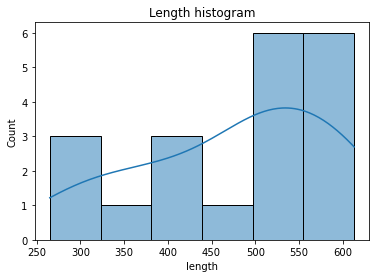

In [17]:
my_fasta.plot_len()

Save the plot if we want to 

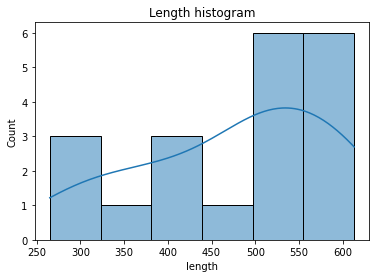

In [18]:
my_fasta.plot_len(save = True, name = 'len_plot.png')

Calculate GC per sequence 

In [19]:
my_fasta.gc()

{'gi|1703783|gb|AA142245.1|AA142245 CK00020.5prime CK Drosophila melanogaster embryo BlueScript Drosophila melanogaster cDNA clone CK00020 5prime, mRNA sequence': 0.5393258426966292,
 'gi|1703784|gb|AA142246.1|AA142246 CK00020.3prime CK Drosophila melanogaster embryo BlueScript Drosophila melanogaster cDNA clone CK00020 3prime, mRNA sequence': 0.5171026156941649,
 'gi|1704556|gb|AA141074.1|AA141074 CK01167.contig CK Drosophila melanogaster embryo BlueScript Drosophila melanogaster cDNA clone CK01167 contig, mRNA sequence': 0.4774011299435028,
 'gi|1704738|gb|AA141286.1|AA141286 CK01498.3prime CK Drosophila melanogaster embryo BlueScript Drosophila melanogaster cDNA clone CK01498 3prime similar to 0:, mRNA sequence': 0.4769736842105263,
 'gi|1705114|gb|AA141642.1|AA141642 CK02190.3prime CK Drosophila melanogaster embryo BlueScript Drosophila melanogaster cDNA clone CK02190 3prime similar to 0:, mRNA sequence': 0.4486301369863014,
 'gi|1705221|gb|AA141776.1|AA141776 CK02422.contig CK Dro

Calculate average GC 

In [20]:
my_fasta.gc_average()

0.5171323714009779

Count number of 'N' in sequences    

In [21]:
my_fasta.count_n()

{'n': 31, 'seqs': 11}

Plot the histogram of frequences of all the possible 4-mers

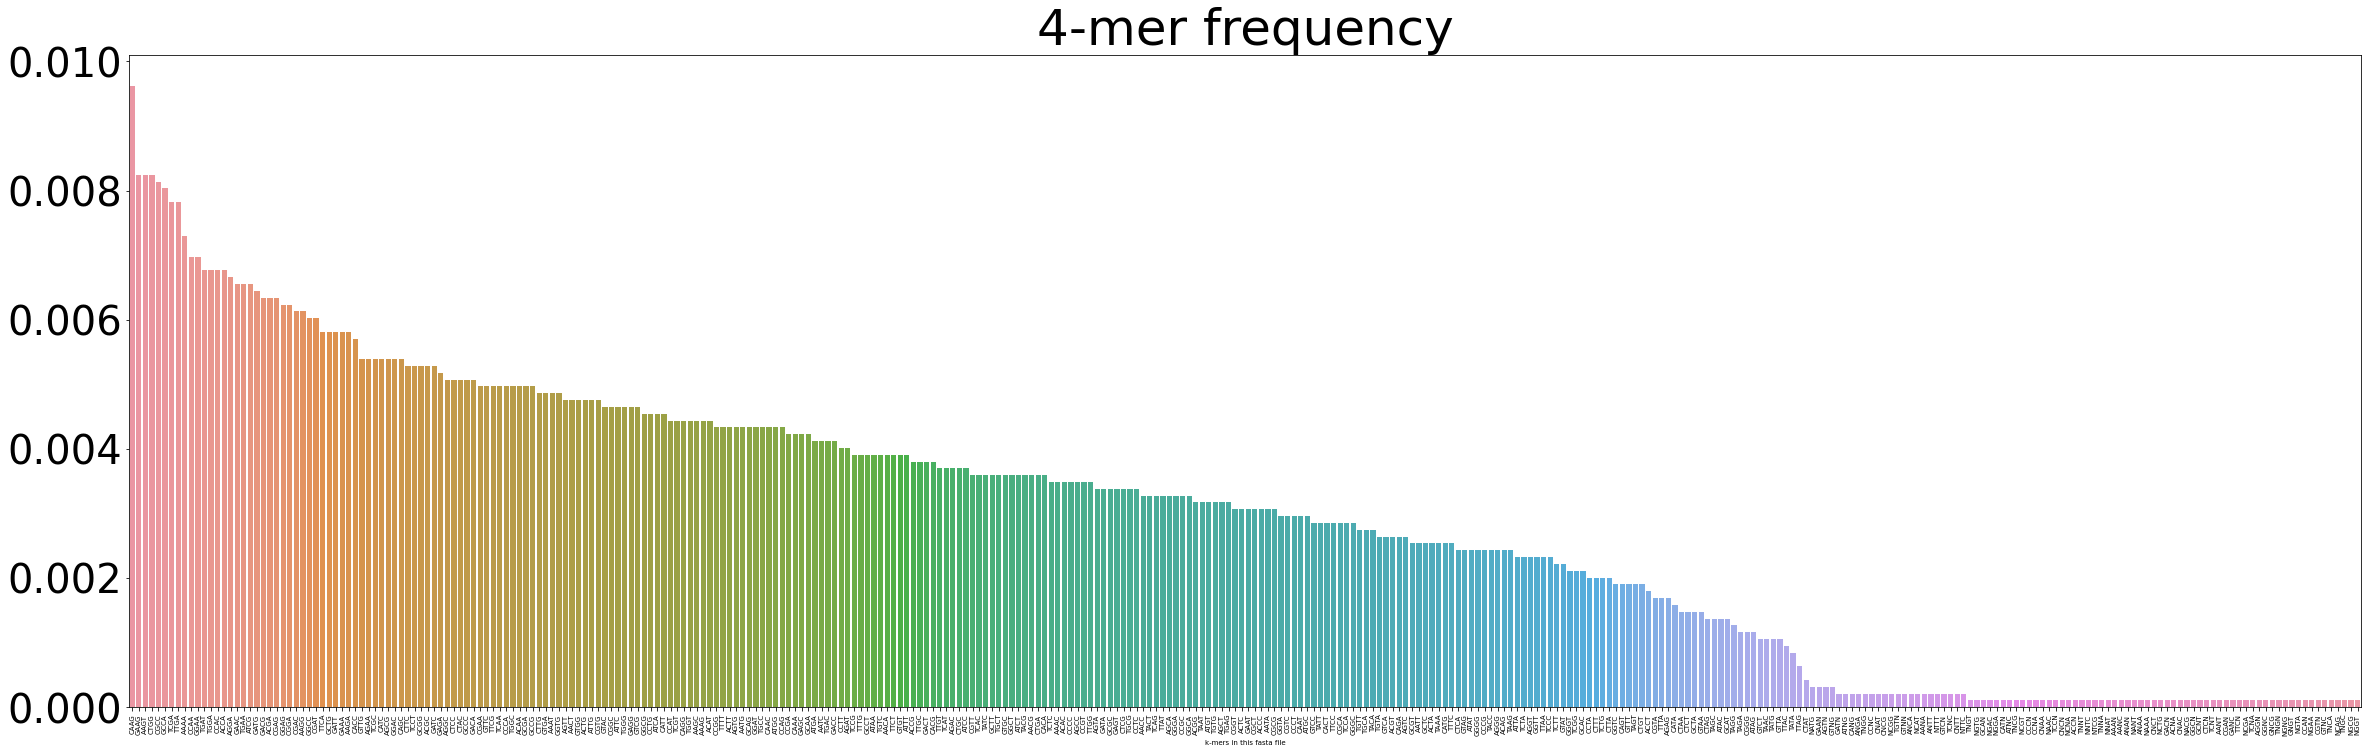

In [22]:
my_fasta.plot_4mers()

All the metrics methods together

Number of sequences:  20
Average GC-content:  0.5171323714009779
11 sequences contating 'N' characters, 31 'N' characters in total


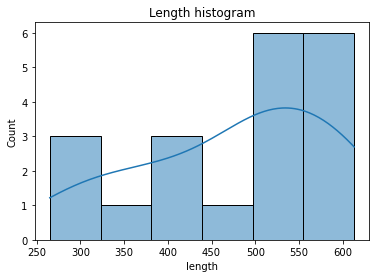

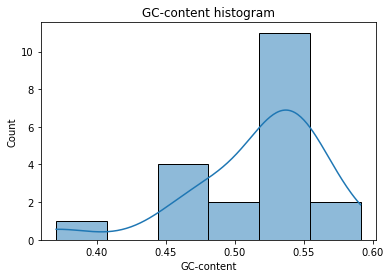

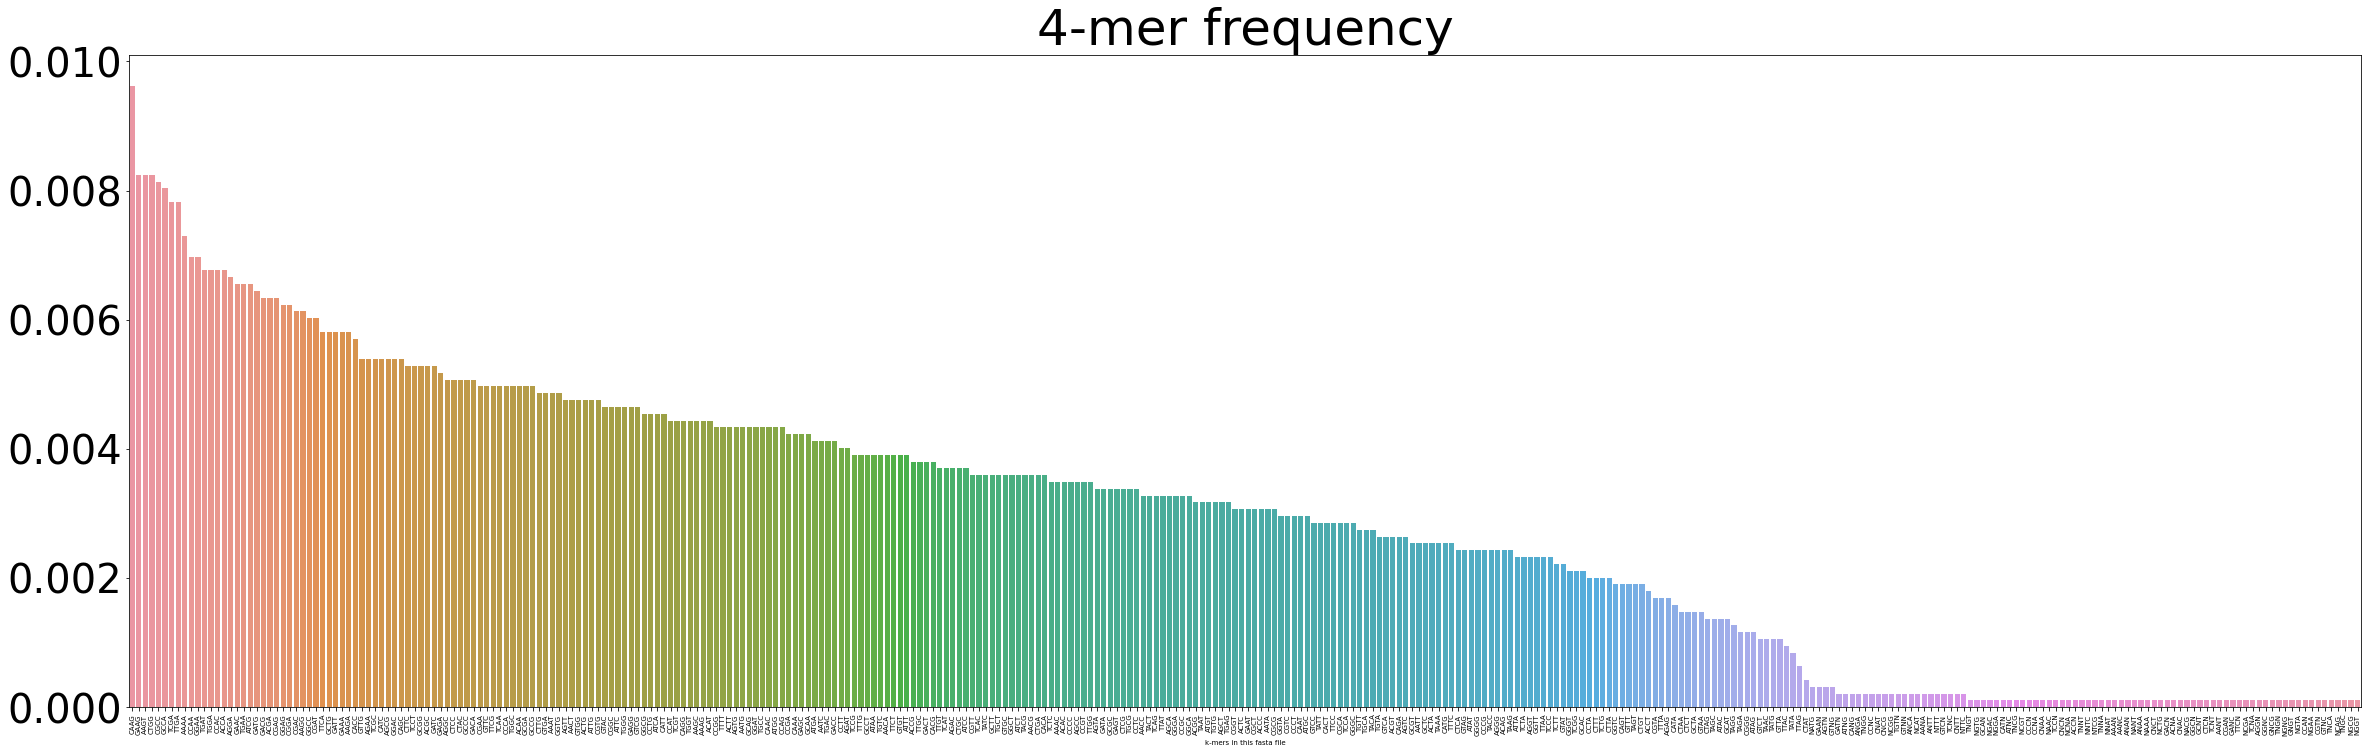

In [24]:
my_fasta.metrics()